In [15]:
# teleport the state 0 + 1 /sqt(2)
# (in other words, the state when you apply Hadamard on zero quantum state)

In [16]:
from qiskit import *

In [17]:
circuit = QuantumCircuit(3,3)

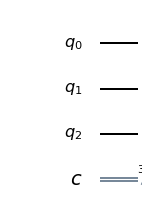

In [18]:
%matplotlib inline
circuit.draw(output='mpl')

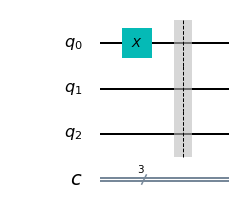

In [19]:
circuit.h(0)
# cirtuit.x caused state 1 on the q0
circuit.barrier()
circuit.draw('mpl')

In [20]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [21]:
# now we want to copy state from q0 to q2 using entanglement
# to do that we first:
# create gate H on q1 and then
# then i am applying controlled x gate (cx) bdetween q1 and q2
circuit.h(1)
circuit.cx(1,2)

In [22]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)


[0.        +0.j 0.70710678+0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


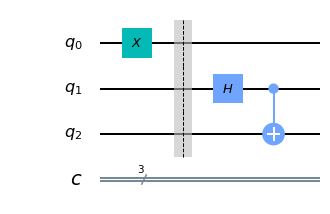

In [23]:
circuit.draw('mpl')

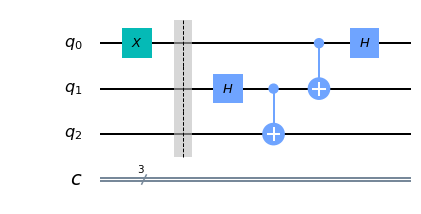

In [24]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw('mpl')

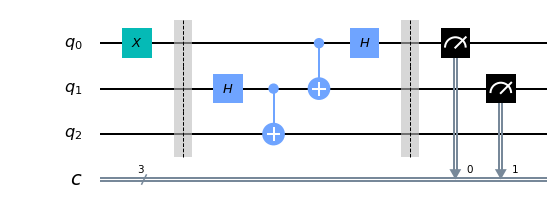

In [25]:
circuit.barrier()
circuit.measure([0,1],[0,1])
# measure q0 and q1 and put results into classical bits c0 and 

#WHY FROM q0 to q1, not q0 to q2 ??? <--------------------------
circuit.draw('mpl')

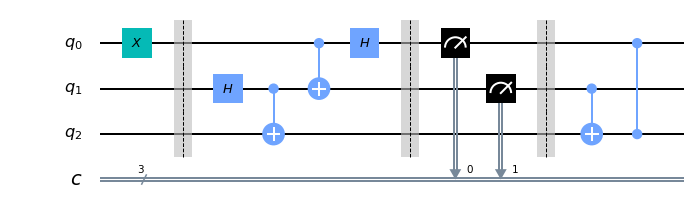

In [26]:
circuit.barrier()

circuit.cx(1,2)

# this gate flips the phase of the target qubit if the control qubit is in the |1⟩ state.
circuit.cz(0,2) 

circuit.draw('mpl')

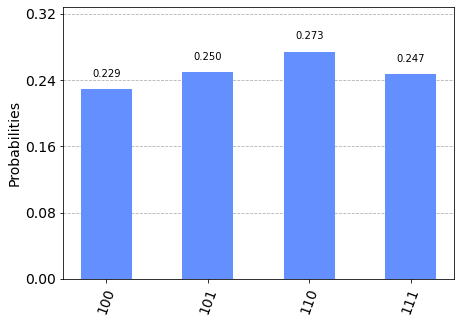

In [27]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)
# histogram interpretation
# 

In [28]:
print(counts)
# print interpretation:
# 

{'111': 253, '110': 280, '101': 256, '100': 235}
